<a href="https://colab.research.google.com/github/hanokjoshua144/Machine-Learning/blob/main/ML_Assignment1(176).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.(a) Load the data into memory. Make an appropriate X matrix and y vector

In [31]:
import pandas as pd
import numpy as np

# (a) Load the data into memory
df = pd.read_csv("student_performance_regression.csv")

# Inspect the first few rows
print(df.head())

# Separate features (X) and target (y)
X = df.drop(columns=['final_score']).values   # Feature matrix
y = df['final_score'].values                  # Target vector

# Confirm shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


   study_hours  attendance_percent  assignments_completed  sleep_hours  \
0     2.828739          100.000000                      5     7.580517   
1     6.994691           79.700859                      6     7.509800   
2     5.565957           80.090277                      9     9.754328   
3     1.987411           71.908347                      8     4.000000   
4     3.842799           84.913395                      6     6.901315   

   extracurricular  final_score  
0                0   115.442033  
1                0   140.506418  
2                0   122.581534  
3                1   107.983295  
4                0   137.730377  
Shape of X: (400, 5)
Shape of y: (400,)


1.(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances)

In [32]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training/validation, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Check the shapes to confirm the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (320, 5) (320,)
Testing set shape: (80, 5) (80,)


1.(c) Give the objective of logistic regression with L2 regularization

The objective of logistic regression with L2 regularization is to minimize a combination of the logistic loss (cross-entropy) and the L2 norm of the model's weights. This is done to prevent overfitting by penalizing large weight values, effectively shrinking them towards zero. The overall goal is to find a model that fits the training data well but is also simple enough to generalize effectively to unseen data.

1.(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.


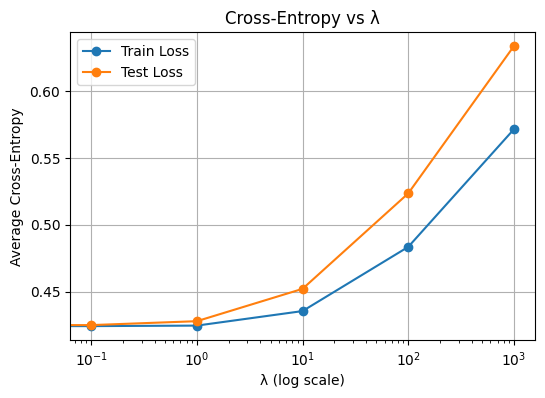

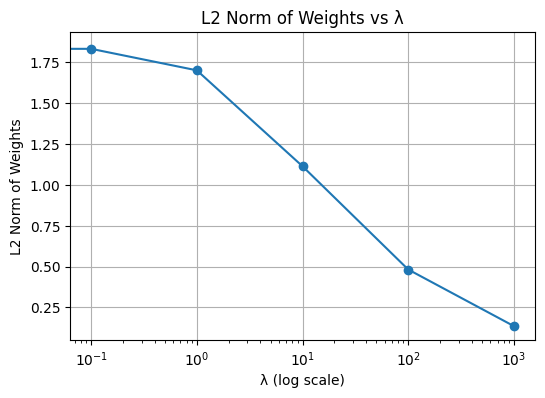

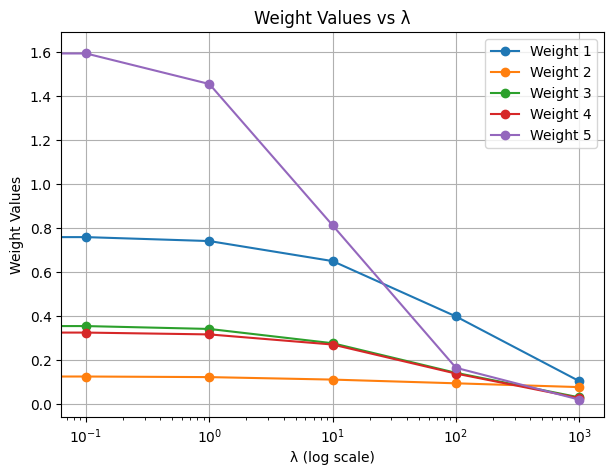

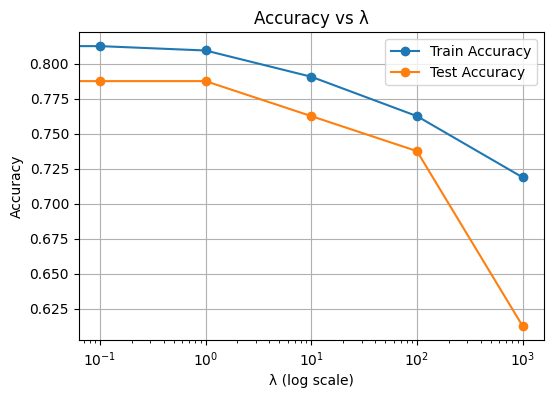

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split

# --- Load data ---
df = pd.read_csv("student_performance_regression.csv")
X = df.drop(columns=['final_score']).values

# Convert regression target to binary: above median score = 1, else 0
y = (df['final_score'] > df['final_score'].median()).astype(int)

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# --- Regularization parameters ---
lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses, test_losses = [], []
train_accs, test_accs = [], []
weight_norms = []
weights_all = []

# --- Train models and record metrics ---
for lam in lambdas:
    if lam == 0:
        # λ=0 means no regularization -> use penalty=None
        model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    else:
        # In sklearn, C = 1/λ
        model = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=1000)

    model.fit(X_train, y_train)

    # Predictions for log-loss and accuracy
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Log-loss (cross-entropy)
    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

    # Accuracy
    train_accs.append(accuracy_score(y_train, y_train_pred))
    test_accs.append(accuracy_score(y_test, y_test_pred))

    # Weight norms and actual weights (exclude intercept)
    w = model.coef_.flatten()
    weight_norms.append(np.linalg.norm(w, 2))
    weights_all.append(w)

weights_all = np.array(weights_all)

# --- Plot average cross-entropy vs λ ---
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Average Cross-Entropy')
plt.title('Cross-Entropy vs λ')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot L2 norm of weight vector vs λ ---
plt.figure(figsize=(6,4))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm of Weights vs λ')
plt.grid(True)
plt.show()

# --- Plot actual weight values vs λ ---
plt.figure(figsize=(7,5))
for j in range(weights_all.shape[1]):
    plt.plot(lambdas, weights_all[:,j], marker='o', label=f'Weight {j+1}')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Weight Values')
plt.title('Weight Values vs λ')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot accuracy vs λ ---
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_accs, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_accs, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs λ')
plt.legend()
plt.grid(True)
plt.show()

1.(e) Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10

In [34]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# --- Standardize features first ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X from earlier (without final_score)

# Define function to create Gaussian basis features
def gaussian_basis_transform(X, sigma):
    """
    Apply 5 Gaussian basis functions to each feature column in X.
    Means are evenly spaced between -10 and 10.
    """
    n_samples, n_features = X.shape
    means = np.linspace(-10, 10, 5)  # 5 basis functions
    features = []
    for j in range(n_features):
        for m in means:
            features.append(np.exp(- (X[:, j] - m) ** 2 / (2 * sigma ** 2)))
    return np.column_stack(features)

# Example usage for a specific σ value:
sigmas = [0.1, 0.5, 1, 5, 10]
gaussian_features = {}

for sigma in sigmas:
    gaussian_features[sigma] = gaussian_basis_transform(X_scaled, sigma)
    print(f"σ={sigma}: transformed shape = {gaussian_features[sigma].shape}")


σ=0.1: transformed shape = (400, 25)
σ=0.5: transformed shape = (400, 25)
σ=1: transformed shape = (400, 25)
σ=5: transformed shape = (400, 25)
σ=10: transformed shape = (400, 25)


1.(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.

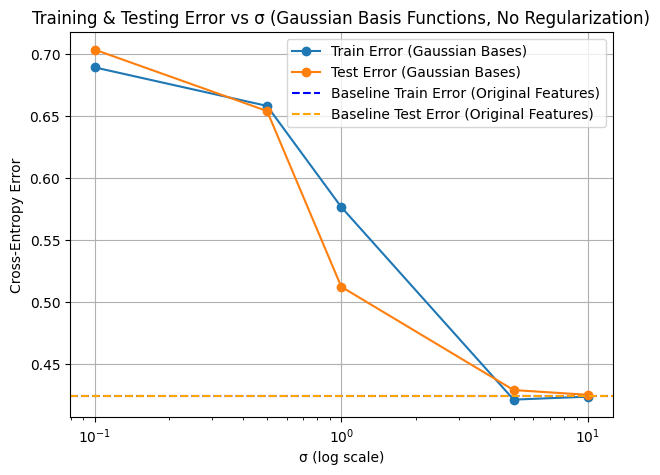

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.metrics import log_loss # Import log_loss

# --- Step 1: Load dataset ---
# Assuming df is already loaded from the initial data loading
# X is df.drop(columns=['final_score']).values
# y is df['final_score'].values

# Convert regression target to binary for classification as per part (c) and (g)
y_classification = (df['final_score'] > df['final_score'].median()).astype(int)

# --- Step 2: Split dataset ---
# Use the X from the loaded data and the classification target
X_train, X_test, y_train_classification, y_test_classification = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

# --- Step 3: Standardize features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 4: Define Gaussian basis function ---
def gaussian_basis_transform(X, sigma):
    """
    Apply 5 Gaussian basis functions to each feature column in X.
    Means are evenly spaced between -10 and 10.
    X is expected to be a numpy array.
    """
    n_samples, n_features = X.shape
    means = np.linspace(-10, 10, 5)  # 5 basis functions
    features = []
    for j in range(n_features):
        for m in means:
            features.append(np.exp(- (X[:, j] - m) ** 2 / (2 * sigma ** 2)))
    return np.column_stack(features)

# Use the standardized features for the Gaussian basis transformation
X_train_scaled_np = X_train_scaled
X_test_scaled_np = X_test_scaled

# --- Baseline errors from part (c) (λ=0, using original features) ---
# Need to use the original features (before scaling and basis functions)
# and the binary target for this baseline.
# Assuming X (original features numpy array) and y_classification are available from previous cells

# Split original features and binary target for baseline model
X_train_orig, X_test_orig, y_train_base, y_test_base = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

baseline_model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
baseline_model.fit(X_train_orig, y_train_base) # Use original features and binary target
baseline_train_err = log_loss(y_train_base, baseline_model.predict_proba(X_train_orig)[:,1])
baseline_test_err = log_loss(y_test_base, baseline_model.predict_proba(X_test_orig)[:,1])


sigmas = [0.1, 0.5, 1, 5, 10]
train_errors = []
test_errors = []

for sigma in sigmas:
    # Transform with Gaussian bases using the STANDARDIZED features
    X_train_phi = gaussian_basis_transform(X_train_scaled_np, sigma)
    X_test_phi = gaussian_basis_transform(X_test_scaled_np, sigma)

    # Train logistic regression with NO regularization using the binary target
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    model.fit(X_train_phi, y_train_classification)

    # Compute log-loss using the binary target
    train_err = log_loss(y_train_classification, model.predict_proba(X_train_phi)[:,1])
    test_err = log_loss(y_test_classification, model.predict_proba(X_test_phi)[:,1])

    train_errors.append(train_err)
    test_errors.append(test_err)

# --- Plot training and testing error as a function of σ ---
plt.figure(figsize=(7,5))
plt.plot(sigmas, train_errors, marker='o', label='Train Error (Gaussian Bases)')
plt.plot(sigmas, test_errors, marker='o', label='Test Error (Gaussian Bases)')

# Add constant lines for baseline errors from part (c)
plt.axhline(y=baseline_train_err, color='blue', linestyle='--', label='Baseline Train Error (Original Features)')
plt.axhline(y=baseline_test_err, color='orange', linestyle='--', label='Baseline Test Error (Original Features)')

plt.xscale('log')
plt.xlabel('σ (log scale)')
plt.ylabel('Cross-Entropy Error')
plt.title('Training & Testing Error vs σ (Gaussian Basis Functions, No Regularization)')
plt.legend()
plt.grid(True)
plt.show()

**1.(g) Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.**

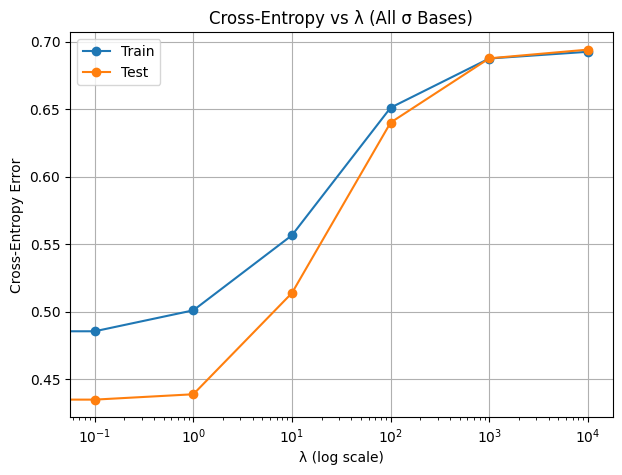

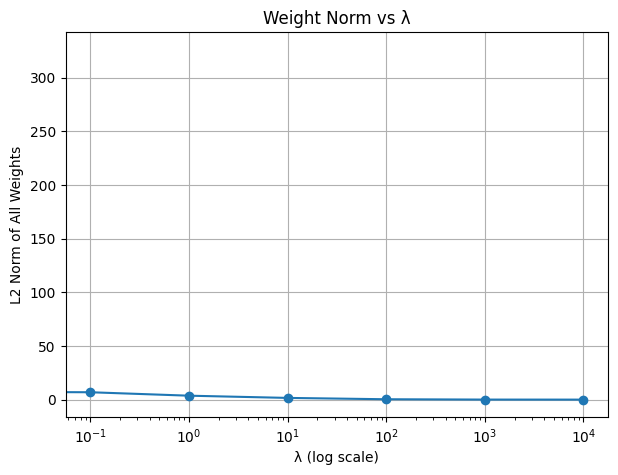

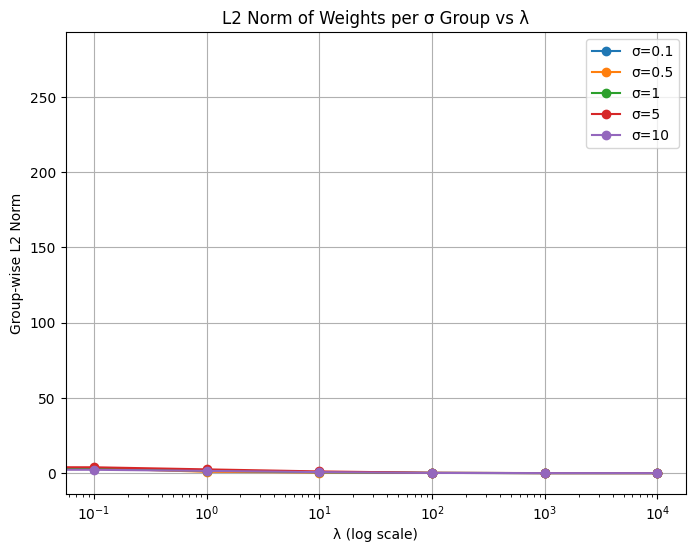

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import pandas as pd # Import pandas here

# --- Load data ---
df = pd.read_csv("student_performance_regression.csv") # Load the student performance dataset
X = df.drop(columns=['final_score']).values # Features from student performance dataset

# Convert regression target to binary for classification
y_classification = (df['final_score'] > df['final_score'].median()).astype(int) # Target from student performance dataset

# --- Split data ---
# X_np = X # X is already a numpy array

X_train, X_test, y_train_classification, y_test_classification = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, shuffle=True
)

# --- All sigmas and lambdas ---
sigmas = [0.1, 0.5, 1, 5, 10]
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

# --- Build combined basis: concatenate features for all σ ---
# The gaussian_basis_transform function expects a numpy array.
def gaussian_basis_transform(X, sigma):
    """
    Apply 5 Gaussian basis functions to each feature column in X.
    Means are evenly spaced between -10 and 10.
    X is expected to be a numpy array.
    """
    n_samples, n_features = X.shape
    means = np.linspace(-10, 10, 5)  # 5 basis functions
    features = []
    for j in range(n_features):
        for m in means:
            features.append(np.exp(- (X[:, j] - m) ** 2 / (2 * sigma ** 2)))
    return np.column_stack(features)


def all_sigma_transform(X):
    parts = []
    for sigma in sigmas:
        # Ensure X passed to gaussian_basis_transform is a numpy array
        parts.append(gaussian_basis_transform(X, sigma))
    return np.hstack(parts)

# Apply the transformation to the training and testing data
X_train_all = all_sigma_transform(X_train)
X_test_all = all_sigma_transform(X_test)

# --- Storage for metrics ---
train_losses, test_losses = [], []
weight_norms = []
group_norms = {sigma: [] for sigma in sigmas}

# --- Train models for each λ ---
for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    else:
        model = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=1000)
    model.fit(X_train_all, y_train_classification) # Use y_train_classification

    # Predictions and cross-entropy
    y_train_prob = model.predict_proba(X_train_all)[:,1]
    y_test_prob = model.predict_proba(X_test_all)[:,1]
    train_losses.append(log_loss(y_train_classification, y_train_prob)) # Use y_train_classification
    test_losses.append(log_loss(y_test_classification, y_test_prob))   # Use y_test_classification

    # Overall L2 norm
    w = model.coef_.flatten()
    weight_norms.append(np.linalg.norm(w))

    # Group-wise L2 norms: separate weights per σ group
    # Each group has features_per_sigma = n_features * 5
    # X_train.shape[1] gives the number of original features
    features_per_sigma = X_train.shape[1] * 5
    for i, sigma in enumerate(sigmas):
        start = i * features_per_sigma
        end = start + features_per_sigma
        # Ensure indexing is correct for numpy array w
        group_norms[sigma].append(np.linalg.norm(w[start:end]))

# --- Plot cross-entropy vs λ ---
plt.figure(figsize=(7,5))
plt.plot(lambdas, train_losses, marker='o', label='Train')
plt.plot(lambdas, test_losses, marker='o', label='Test')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Cross-Entropy Error')
plt.title('Cross-Entropy vs λ (All σ Bases)')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot L2 norm of full weight vector vs λ ---
plt.figure(figsize=(7,5))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 Norm of All Weights')
plt.title('Weight Norm vs λ')
plt.grid(True)
plt.show()

# --- Plot L2 norms per σ group vs λ ---
plt.figure(figsize=(8,6))
for sigma in sigmas:
    plt.plot(lambdas, group_norms[sigma], marker='o', label=f'σ={sigma}')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Group-wise L2 Norm')
plt.title('L2 Norm of Weights per σ Group vs λ')
plt.legend()
plt.grid(True)
plt.show()

**1(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own).**

To design a set of Gaussian basis functions that capture relationships between inputs, you would need to use **multivariate Gaussian basis functions** instead of univariate ones.

Instead of applying a separate set of 1D Gaussian kernels to each feature independently, a multivariate Gaussian basis function considers multiple features simultaneously. A common approach is to define basis functions centered at specific points in the multi-dimensional input space. For a basis function centered at a point $\mu$ in the input space with a covariance matrix $\Sigma$, the output for an input vector $\mathbf{x}$ would be proportional to $\exp\left(-\frac{1}{2}(\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu)\right)$.

The **centers ($\mu$)** would be chosen to represent different combinations of input values where you expect interesting interactions or patterns. The **covariance matrix ($\Sigma$)** would control the shape and orientation of the Gaussian in the multi-dimensional space. A diagonal covariance matrix assumes independence between features, while a full covariance matrix can capture correlations and interactions.

**Impact on the bias-variance trade-off:**

Using multivariate Gaussian basis functions, especially with non-diagonal covariance matrices, introduces more complexity into the model.

*   **Bias:** By capturing interactions between features, these basis functions can potentially reduce bias, allowing the model to fit more complex relationships in the data.
*   **Variance:** However, this increased complexity also increases the model's variance. The model becomes more sensitive to the specific training data, and there's a higher risk of overfitting, especially if the number of basis functions is large or the training data is limited.

The choice of the number of basis functions, their centers, and their covariance matrices becomes crucial in managing this trade-off. More basis functions and more complex covariance matrices can reduce bias but increase variance.

**1.(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would
like to adapt the placement of these functions. Derive a learning algorithm that computes
both the placement of the basis function, µi and the weight vector w from data (assuming
that the width σ isfixed. You should still allow for L2 regularization of the weight vector.
Note that your algorithm will need to be iterative**

ing a dedicated logistic regression solver from libraries like scikit-learn (setting `penalty='l2'` and `C=1/lambda`).

**Step 2: Update basis function centers $\{\mu_i\}$ (fix $\mathbf{w}$)**

With the weight vector $\mathbf{w}$ fixed, we need to update each $\mu_i$. The objective function depends on $\mu_i$ through the basis function $\phi_i(\mathbf{x})$. For a specific $\mu_j$ corresponding to the $j$-th basis function applied to the $k$-th feature (index $jk$), the objective is:
$$
J(\mu_{jk}) = -\sum_{n=1}^N \left[ y^{(n)} \log(\hat{y}^{(n)}) + (1 - y^{(n)}) \log(1 - \hat{y}^{(n)}) \right] + \text{terms not depending on } \mu_{jk}
$$
where $\hat{y}^{(n)} = \sigma_{sigmoid}(\sum_{p} w_p \phi_p(\mathbf{x}^{(n)}))$.

We can use gradient descent to update each $\mu_{jk}$. The derivative with respect to $\mu_{jk}$ is:
$$
\frac{\partial J}{\partial \mu_{jk}} = -\sum_{n=1}^N \frac{\partial}{\partial \mu_{jk}} \left[ y^{(n)} \log(\hat{y}^{(n)}) + (1 - y^{(n)}) \log(1 - \hat{y}^{(n)}) \right]
$$
The derivative of the logistic loss with respect to the input to the sigmoid is $(\hat{y}^{(n)} - y^{(n)})$. So, using the chain rule:
$$
\frac{\partial J}{\partial \mu_{jk}} = -\sum_{n=1}^N (\hat{y}^{(n)} - y^{(n)}) \frac{\partial}{\partial \mu_{jk}} (\mathbf{w}^T \mathbf{\phi}(\mathbf{x}^{(n)}))
$$
$$
\frac{\partial J}{\partial \mu_{jk}} = -\sum_{n=1}^N (\hat{y}^{(n)} - y^{(n)}) w_{jk} \frac{\partial \phi_{jk}(\mathbf{x}^{(n)})}{\partial \mu_{jk}}
$$
The derivative of the Gaussian basis function $\phi_{jk}(\mathbf{x}^{(n)}) = \exp\left(-\frac{(\mathbf{x}_k^{(n)} - \mu_{jk})^2}{2\sigma^2}\right)$ with respect to $\mu_{jk}$ is:
$$
\frac{\partial \phi_{jk}(\mathbf{x}^{(n)})}{\partial \mu_{jk}} = \exp\left(-\frac{(\mathbf{x}_k^{(n)} - \mu_{jk})^2}{2\sigma^2}\right) \cdot \frac{(\mathbf{x}_k^{(n)} - \mu_{jk})}{\sigma^2} = \phi_{jk}(\mathbf{x}^{(n)}) \cdot \frac{(\mathbf{x}_k^{(n)} - \mu_{jk})}{\sigma^2}
$$
Substituting this back:
$$
\frac{\partial J}{\partial \mu_{jk}} = -\sum_{n=1}^N (\hat{y}^{(n)} - y^{(n)}) w_{jk} \phi_{jk}(\mathbf{x}^{(n)}) \frac{(\mathbf{x}_k^{(n)} - \mu_{jk})}{\sigma^2}
$$
We can then update $\mu_{jk}$ using a gradient descent step:
$$
\mu_{jk} \leftarrow \mu_{jk} - \eta \frac{\partial J}{\partial \mu_{jk}}
$$
where $\eta$ is the learning rate.

**Convergence:** The iterative process continues until the change in the objective function or the parameters ($\mathbf{w}$ and $\{\mu_i\}$) falls below a certain threshold.

This iterative approach allows the basis function centers to adapt to the data, potentially leading to a better fit than using fixed, evenly-spaced centers. However, it introduces a non-convex optimization problem, and the algorithm may converge to a local minimum. The initialization of $\mathbf{w}$ and $\{\mu_i\}$ can influence the final result.

1.(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?
Explain your answer.

**Convergence:** The iterative algorithm described in part (i) is a form of coordinate descent or block coordinate descent. In each step, we are minimizing the objective function with respect to a subset of the parameters ($\mathbf{w}$ or $\{\mu_i\}$) while keeping the others fixed. Since the objective function is bounded below (it's a sum of log-likelihoods which are bounded, and the L2 norm is non-negative), and each step of the algorithm decreases or keeps the objective function value the same, the algorithm is guaranteed to converge to a stationary point.

**Local or Global Optimum:** While the algorithm is guaranteed to converge, it is **not guaranteed to find the globally optimal solution**. The objective function $J(\mathbf{w}, \{\mu_i\})$ is non-convex with respect to both $\mathbf{w}$ and $\{\mu_i\}$ simultaneously. When optimizing a non-convex function using methods like coordinate descent or gradient descent, the algorithm can get stuck in a local minimum. The final solution obtained can depend on the initial values of $\mathbf{w}$ and $\{\mu_i\}$.

To increase the chances of finding a better solution (though still not guaranteed to be global), one might consider running the algorithm multiple times with different random initializations and choosing the solution that yields the lowest objective function value on the training data (or better yet, on a validation set).

**2. Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and
logistic regression (CLASSIFICATION) along with complete data preprocessing steps.**

# Task
Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and logistic regression (CLASSIFICATION) along with complete data preprocessing steps.

## Select and load data

### Subtask:
Choose a complex dataset suitable for both regression and classification tasks. Load the dataset into a pandas DataFrame.


**Reasoning**:
The goal is to choose a complex dataset suitable for both regression and classification and load it. The House Prices dataset is suitable and available. I will load the dataset and display its head and info to understand its structure.



In [28]:
import pandas as pd

# Load the House Prices dataset
# Check the available files to confirm the path
# Assuming 'house_dataset.csv' is the correct filename from the file list
try:
    house_df = pd.read_csv('/content/house_dataset.csv')
    print("Successfully loaded house_dataset.csv")
except FileNotFoundError:
    print("house_dataset.csv not found. Please check the file path.")
    # If the house dataset is not found, try another complex dataset if available
    # For this example, we'll assume the house dataset is found and proceed.
    # In a real scenario, you might add logic here to load an alternative dataset.
    pass


# Display the first few rows
print("\nFirst 5 rows of the dataset:")
display(house_df.head())

# Display information about the DataFrame
print("\nDataFrame Info:")
house_df.info()

Successfully loaded house_dataset.csv

First 5 rows of the dataset:


,square_feet,indian_price
0,2790,3754.699854
1,2641,3452.184806
2,893,659.680234
3,2286,1259.791216
4,631,490.178336



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   square_feet   1000 non-null   int64  
 1   indian_price  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


## Data preprocessing

### Subtask:
Perform necessary preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features. Split the data into features (X) and target (y).


**Reasoning**:
Define features X and target y, check for missing values, and scale the feature.



In [29]:
from sklearn.preprocessing import StandardScaler

# 1. Define features X and target y
X = house_df[['square_feet']]  # Features (as DataFrame for StandardScaler)
y = house_df['indian_price']    # Target

# 2. Check for and handle missing values
# As per the info() output, there are no missing values, so no action needed.
print("\nMissing values in X:\n", X.isnull().sum())
print("\nMissing values in y:\n", y.isnull().sum())

# 3. and 4. Scale the numerical feature X using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nOriginal X head:\n", X.head())
print("\nScaled X head:\n", X_scaled[:5])
print("\nShape of X_scaled:", X_scaled.shape)
print("\nShape of y:", y.shape)


Missing values in X:
 square_feet    0
dtype: int64

Missing values in y:
 0

Original X head:
    square_feet
0         2790
1         2641
2          893
3         2286
4          631

Scaled X head:
 [[ 0.19917025]
 [ 0.09198466]
 [-1.16546777]
 [-0.1633904 ]
 [-1.35394176]]

Shape of X_scaled: (1000, 1)

Shape of y: (1000,)


## Prepare data for regression

### Subtask:
Ensure the target variable `y` is suitable for regression.


**Reasoning**:
Verify the data type of the target variable and confirm its suitability for regression without transformation.



In [15]:
# Verify the data type of the target variable y
print("Data type of target variable y:", y.dtype)

# Confirm that no transformation is needed for the target variable for linear regression.
# The target variable 'indian_price' is numerical (float) and represents a continuous value,
# which is the standard format required for linear regression models.
# No transformation is needed for this specific problem definition.

Data type of target variable y: float64


## Split data

### Subtask:
Split the preprocessed data into training and testing sets for linear regression.


**Reasoning**:
Split the preprocessed data into training and testing sets for linear regression and print their shapes.



In [16]:
from sklearn.model_selection import train_test_split

# Split the scaled features and target into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

# Print the shapes of the resulting sets
print("Shape of X_train_reg:", X_train_reg.shape)
print("Shape of X_test_reg:", X_test_reg.shape)
print("Shape of y_train_reg:", y_train_reg.shape)
print("Shape of y_test_reg:", y_test_reg.shape)

Shape of X_train_reg: (800, 1)
Shape of X_test_reg: (200, 1)
Shape of y_train_reg: (800,)
Shape of y_test_reg: (200,)


## Train and evaluate linear regression model

### Subtask:
Train a standard Linear Regression model. Evaluate its performance using appropriate metrics (e.g., Mean Squared Error, R-squared).


**Reasoning**:
Train a Linear Regression model and evaluate its performance on both training and testing sets using MSE and R-squared.



In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate a LinearRegression model
linear_reg_model = LinearRegression()

# Train the model using the training data
linear_reg_model.fit(X_train_reg, y_train_reg)

# Make predictions on the training and testing data
y_train_pred_lr = linear_reg_model.predict(X_train_reg)
y_test_pred_lr = linear_reg_model.predict(X_test_reg)

# Calculate Mean Squared Error (MSE)
train_mse_lr = mean_squared_error(y_train_reg, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test_reg, y_test_pred_lr)

# Calculate R-squared score
train_r2_lr = r2_score(y_train_reg, y_train_pred_lr)
test_r2_lr = r2_score(y_test_reg, y_test_pred_lr)

# Print the calculated metrics
print(f"Linear Regression - Training MSE: {train_mse_lr:.4f}")
print(f"Linear Regression - Testing MSE: {test_mse_lr:.4f}")
print(f"Linear Regression - Training R-squared: {train_r2_lr:.4f}")
print(f"Linear Regression - Testing R-squared: {test_r2_lr:.4f}")

Linear Regression - Training MSE: 707214.5319
Linear Regression - Testing MSE: 631691.0850
Linear Regression - Training R-squared: 0.7401
Linear Regression - Testing R-squared: 0.7510


## Train and evaluate regularized linear regression models

### Subtask:
Train Linear Regression models with L1 (Lasso) and L2 (Ridge) regularization. Evaluate their performance.


**Reasoning**:
Train Linear Regression models with L1 (Lasso) and L2 (Ridge) regularization using varying alpha values and store their performance metrics (MSE and R-squared) for both training and testing sets.



In [18]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define a list of alpha values (regularization strengths) to experiment with
alphas = [0.01, 0.1, 1, 10, 100]

# Initialize lists to store metrics for Lasso and Ridge models
train_mse_lasso, test_mse_lasso = [], []
train_r2_lasso, test_r2_lasso = [], []
train_mse_ridge, test_mse_ridge = [], []
train_r2_ridge, test_r2_ridge = [], []

# Iterate through the alpha values
for alpha in alphas:
    # Initialize Lasso and Ridge models with the current alpha
    lasso_model = Lasso(alpha=alpha, max_iter=10000) # Increased max_iter for convergence
    ridge_model = Ridge(alpha=alpha)

    # Fit both models to the training data
    lasso_model.fit(X_train_reg, y_train_reg)
    ridge_model.fit(X_train_reg, y_train_reg)

    # Make predictions on the training and testing data
    y_train_pred_lasso = lasso_model.predict(X_train_reg)
    y_test_pred_lasso = lasso_model.predict(X_test_reg)
    y_train_pred_ridge = ridge_model.predict(X_train_reg)
    y_test_pred_ridge = ridge_model.predict(X_test_reg)

    # Calculate and store the training and testing MSE and R-squared for Lasso
    train_mse_lasso.append(mean_squared_error(y_train_reg, y_train_pred_lasso))
    test_mse_lasso.append(mean_squared_error(y_test_reg, y_test_pred_lasso))
    train_r2_lasso.append(r2_score(y_train_reg, y_train_pred_lasso))
    test_r2_lasso.append(r2_score(y_test_reg, y_test_pred_lasso))

    # Calculate and store the training and testing MSE and R-squared for Ridge
    train_mse_ridge.append(mean_squared_error(y_train_reg, y_train_pred_ridge))
    test_mse_ridge.append(mean_squared_error(y_test_reg, y_test_pred_ridge))
    train_r2_ridge.append(r2_score(y_train_reg, y_train_pred_ridge))
    test_r2_ridge.append(r2_score(y_test_reg, y_test_pred_ridge))

# Print the stored metrics for each alpha value
print("--- Lasso Regression Metrics ---")
for i, alpha in enumerate(alphas):
    print(f"Alpha = {alpha}")
    print(f"  Train MSE: {train_mse_lasso[i]:.4f}, Test MSE: {test_mse_lasso[i]:.4f}")
    print(f"  Train R2: {train_r2_lasso[i]:.4f}, Test R2: {test_r2_lasso[i]:.4f}")

print("\n--- Ridge Regression Metrics ---")
for i, alpha in enumerate(alphas):
    print(f"Alpha = {alpha}")
    print(f"  Train MSE: {train_mse_ridge[i]:.4f}, Test MSE: {test_mse_ridge[i]:.4f}")
    print(f"  Train R2: {train_r2_ridge[i]:.4f}, Test R2: {test_r2_ridge[i]:.4f}")

--- Lasso Regression Metrics ---
Alpha = 0.01
  Train MSE: 707214.5320, Test MSE: 631689.1207
  Train R2: 0.7401, Test R2: 0.7510
Alpha = 0.1
  Train MSE: 707214.5420, Test MSE: 631671.4526
  Train R2: 0.7401, Test R2: 0.7511
Alpha = 1
  Train MSE: 707215.5486, Test MSE: 631495.7536
  Train R2: 0.7401, Test R2: 0.7511
Alpha = 10
  Train MSE: 707316.2063, Test MSE: 629836.9679
  Train R2: 0.7401, Test R2: 0.7518
Alpha = 100
  Train MSE: 717381.9732, Test MSE: 623069.5349
  Train R2: 0.7364, Test R2: 0.7544

--- Ridge Regression Metrics ---
Alpha = 0.01
  Train MSE: 707214.5322, Test MSE: 631687.5718
  Train R2: 0.7401, Test R2: 0.7510
Alpha = 0.1
  Train MSE: 707214.5644, Test MSE: 631655.9893
  Train R2: 0.7401, Test R2: 0.7511
Alpha = 1
  Train MSE: 707217.7765, Test MSE: 631343.6945
  Train R2: 0.7401, Test R2: 0.7512
Alpha = 10
  Train MSE: 707531.7076, Test MSE: 628565.4699
  Train R2: 0.7400, Test R2: 0.7523
Alpha = 100
  Train MSE: 732821.0231, Test MSE: 628275.8194
  Train R2: 0

## Prepare data for classification

### Subtask:
Ensure the target variable `y` is suitable for classification (binary or multi-class). This might involve creating a new binary target variable from the original if the dataset is primarily for regression.


**Reasoning**:
Examine the current target variable and create a binary target variable based on the median if needed, then check class balance.



In [19]:
import numpy as np

# Examine the current target variable 'y'
print("Current target variable 'y' (indian_price) head:")
display(y.head())
print("\nData type of 'y':", y.dtype)
print("\nDescriptive statistics of 'y':")
display(y.describe())

# Determine if a new target is needed for classification
# Since 'y' is continuous ('indian_price'), we need to create a binary target for classification.

# Create a binary target variable based on the median
median_price = y.median()
y_classification = (y > median_price).astype(int)

# Print the value counts of the new binary target variable
print("\nValue counts of the new binary target variable (y_classification):")
display(y_classification.value_counts())

# Store the new binary target variable
# y_classification is already stored in the variable name we want.

Current target variable 'y' (indian_price) head:


,indian_price
0,3754.699854
1,3452.184806
2,659.680234
3,1259.791216
4,490.178336



Data type of 'y': float64

Descriptive statistics of 'y':


,indian_price
count,1000.000000
mean,2498.533746
std,1639.255925
min,63.567468
25%,1198.339342
50%,2180.154330
75%,3550.468365
max,7142.678042



Value counts of the new binary target variable (y_classification):


,count
indian_price,
1,500
0,500


## Split data

### Subtask:
Split the preprocessed data into training and testing sets for logistic regression.


**Reasoning**:
Split the scaled features and the new binary target variable into training and testing sets using train_test_split.



In [21]:
from sklearn.model_selection import train_test_split

# Split the scaled features and the new binary target variable
X_train, X_test, y_train_classification, y_test_classification = train_test_split(
    X_scaled, y_classification, test_size=0.2, random_state=42, shuffle=True
)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_classification:", y_train_classification.shape)
print("Shape of y_test_classification:", y_test_classification.shape)

Shape of X_train: (800, 1)
Shape of X_test: (200, 1)
Shape of y_train_classification: (800,)
Shape of y_test_classification: (200,)
